In [1]:
from bayes_opt import BayesOpt
import matplotlib.pyplot as plt
from bayes_opt.test_functions import functions
from bayes_opt.visualization import vis_variance_reduction_search as viz
import warnings
import sys

warnings.filterwarnings("ignore")

# Use a branin function


In [2]:
myfunction=functions.branin(sd=0)


# Initialize Bayesian optimization

In [3]:
func=myfunction.func
   

acq_func={}
acq_func['name']='pvrs'
acq_func['dim']=myfunction.input_dim
    

func_params={}
func_params['function']=myfunction


acq_params={}
acq_params['acq_func']=acq_func
gp_params = {'kernel':'SE','lengthscale':0.2*myfunction.input_dim,'noise_delta':1e-8}


bo=BayesOpt(gp_params,func_params,acq_params)

In [4]:

# initialize BO using 3*dim number of observations
bo.init(gp_params,n_init_points=1*myfunction.input_dim)

# Suggest an experiment

In [5]:
bo.maximize()
print("recommemded x={}, current inferred value ={:.4f}, best inferred value ={:.4f}".format(bo.X_original[-1],bo.Y_original_maxGP[-1],bo.Y_original_maxGP.max()))


recommemded x=[ 3.10235312 12.90709232], current inferred value =-112.6429, best inferred value =-56.5287


# Visualize the PVRS

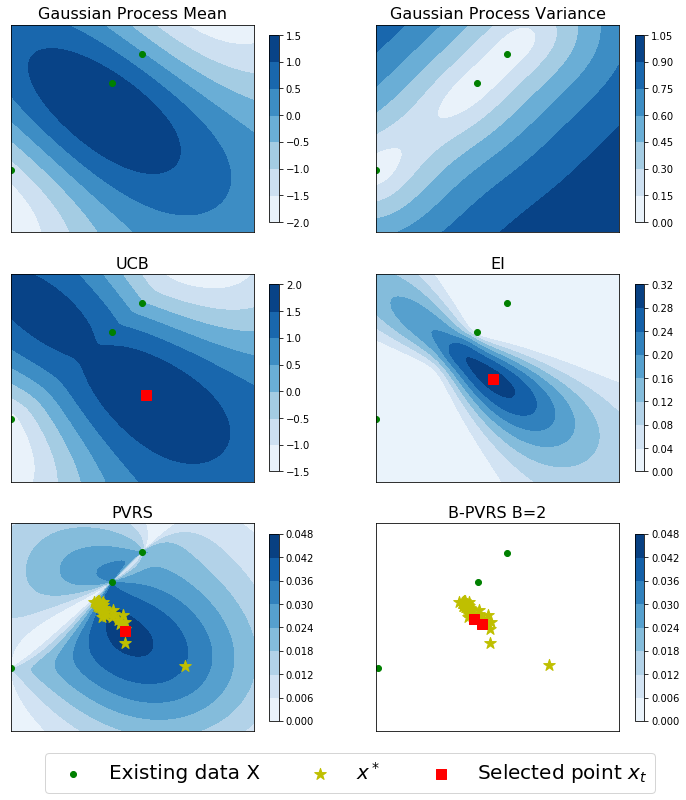

In [6]:
viz.plot_bo_2d_pvrs(bo)

# Suggest a next experiment and visualize it

recommemded x=[0.59378716 8.88172948], current inferred value =-32.3679, best inferred value =-32.3679


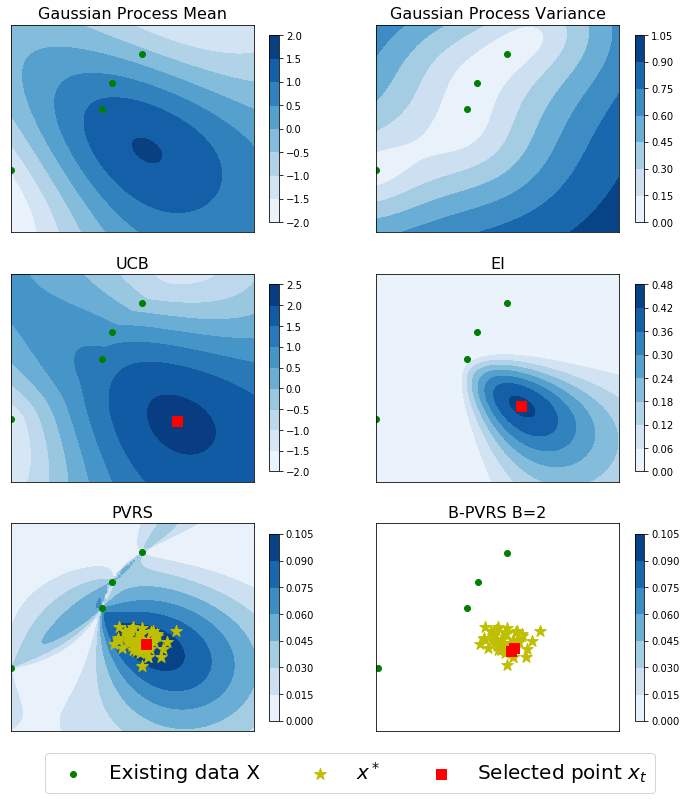

In [7]:
bo.maximize()
print("recommemded x={}, current inferred value ={:.4f}, best inferred value ={:.4f}".format(bo.X_original[-1],bo.Y_original_maxGP[-1],bo.Y_original_maxGP.max()))
viz.plot_bo_2d_pvrs(bo)

# Run for 5 additional experiments

In [8]:
NN=5
for index in range(0,NN):

    bo.maximize()

# Plot the final performance

Text(0.5,1,'Performance')

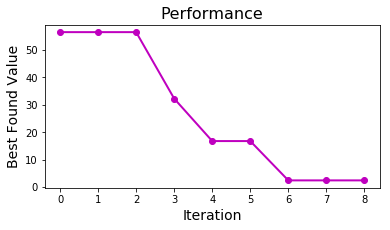

In [9]:

fig=plt.figure(figsize=(6, 3))
myYbest=[bo.Y_original[:idx+1].max()*-1 for idx,val in enumerate(bo.Y_original)]
plt.plot(range(len(myYbest)),myYbest,linewidth=2,color='m',linestyle='-',marker='o')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Best Found Value',fontsize=14)
plt.title('Performance',fontsize=16)